# Analisis del las ligas mayoritarias de LoL

Este proyecto comenzó como una forma de aprender a usar scrapy y a realizar peticiones a una API. Pero con el tiempo se ha convertido en un proyecto de recoleccion de datos, limpiado y análisis.

En este notebook leeré los datos recolectados por un spider y:

- Cargar los datos del spider en un pandas dataframe
- Realizar peticiones a la API de Riot con los datos del spider
- Limpiar y manipular y juntar diferentes dataframes
- Explorar la forma de los datos y la realaciones entre las variables a traves de analisis numerico y visualizacion


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
import re
from os import walk

pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Cargar los datos obtenidos mediante el spider

Por cada parida de competitivo se genera un link a una página web con todos los datos de la partida eso se conoce como Match History (MH). Este spider recolecta todos los MH de la página lolpedia que actúa como un índice.

In [46]:
mh_df = pd.read_csv("Data/mh.csv")
mh_df

,league,mh
0,LEC,http://matchhistory.na.leagueoflegends.com/en/...
1,LEC,http://matchhistory.na.leagueoflegends.com/en/...
2,LEC,http://matchhistory.na.leagueoflegends.com/en/...
3,LEC,http://matchhistory.na.leagueoflegends.com/en/...
4,LEC,http://matchhistory.na.leagueoflegends.com/en/...
5,LEC,http://matchhistory.na.leagueoflegends.com/en/...
6,LEC,http://matchhistory.na.leagueoflegends.com/en/...
7,LEC,http://matchhistory.na.leagueoflegends.com/en/...
8,LEC,http://matchhistory.na.leagueoflegends.com/en/...
9,LEC,http://matchhistory.na.leagueoflegends.com/en/...


Apenas empezamos y ya surge el primer problema. Hay dos servidores diferentes para los datos de MH uno para la liga China y otro para el resto de ligas. Tras una rápida búsqueda parece ser que China obliga por ley a almacenar todo el trafico de internet en servidores que esten en su territorio.

Empleando la herramienta inspeccionar del navegador encuentro que los datos mostrados en estas páginas web son extraidos mediante una llamdama API a otro servidor que proporciona los datos en formato json. ¡Que suerte! Así podré emplear la librería request.

Vamos a ver la estructura los archivos JSON que nos proporciona el servidor Chino para entender como está estructurado y como obtener los datos que nos interesan

In [47]:
url_request = f'https://lpl.qq.com/web201612/data/LOL_MATCH_DETAIL_{7320}.json'
data = requests.get(url_request).json()
data

2021-03-15 18:13:44 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): lpl.qq.com:443
2021-03-15 18:13:46 [urllib3.connectionpool] DEBUG: https://lpl.qq.com:443 "GET /web201612/data/LOL_MATCH_DETAIL_7320.json HTTP/1.1" 200 39145


{'bMatchId': '7320',
 'bMatchName': 'OMG vs TES',
 'GameId': '148',
 'GameName': '2021职业联赛',
 'GameMode': '3',
 'GameModeName': 'BO3',
 'GameTypeId': '1',
 'GameTypeName': '春季赛常规赛',
 'GameProcId': '170',
 'GameProcName': '第七周',
 'TeamA': '6',
 'TeamNameA': 'OMG',
 'ScoreA': '0',
 'TeamB': '42',
 'TeamNameB': 'TES',
 'ScoreB': '2',
 'MatchDate': '2021-03-04',
 'MatchStatus': '3',
 'MatchWin': '2',
 'iQTMatchId': '45780',
 'AppTopicId': '227178',
 'isTft': '0',
 'tftInfos': '',
 'bGameId': '5',
 'MatchTime': '2021-03-04 19:00:00',
 'TeamIcon': [{'TeamIcon': '//img.crawler.qq.com/lolwebvideo/20210106161237/bafc101b6a9064be21b83d50b149bb37/0',
   'TeamId': '6'},
  {'TeamIcon': '//img.crawler.qq.com/lolwebvideo/20190527161755/35a13fdc75e5fb0b047de7a9bf670463/0',
   'TeamId': '42'}],
 'sExt1': '',
 'sExt1Src': '14523145412721355435',
 'sExt2': '{"text":"","video":"0","image":"\\/\\/img.crawler.qq.com\\/lolwebvideo\\/20210106140734\\/29066b543e32e42b320e2a84fe1d61d7\\/0","qtvid":"764502578"}'

Parece ser que en la LPL se juegan los partidos al mejor de tres y en este JSON los datos de cada partida se encuentra en la lista 'sMatchInfo' -> 'battleInfo' -> 'BattleData'. Así que vamos a crear una función que nos devuelva un pandas dataframe con todos los datos interesantes de cada partida

In [48]:
def lpl_df(data):
    data_list=[]
    role_dic = {0:'Top', 1:'Jungle', 2:'Mid', 3:'Bot', 4:'Support'}
    side_list = ['left', 'right']
    
    other_labels = ['team','date','min','role']
    player_keys = ['name', 'win', 'hero',
               'kill','death','assist','gold',
               'lasthit','neutralKilled', 'neutralKilledTJungle', 'neutralKilledEJungle',
               'totalDamageToChamp','pDamageToChamp','mDamageDealtToChamp',
               'totalHeal','totalDamageTaken','pDamageTaken','mDamageTaken',
               'wardsPlaced', 'wardsKilled','visionWardsBought']
    
    date = data['MatchDate']
    team_list = data['sMatchInfo'][0]['bMatchName'].replace(" ", "").split('vs')

    for match in data['sMatchInfo']:
        if match['battleInfo']['BattleData'] != "":
            #string to dictionary
            bd = json.loads(match['battleInfo']['BattleData'])
            duration = float(bd['game-period'])/60
            for side in side_list:
                for i , player_dic in enumerate(bd[side]['players']):
                    player_stats = [player_dic.get(key) for key in player_keys]
                    if team_list[0] == player_stats[0][:len(team_list[0])]:
                        player_stats[0]=player_stats[0].replace(team_list[0],'')
                        team = team_list[0]
                    else:
                        player_stats[0]=player_stats[0].replace(team_list[1],'')
                        team = team_list[1]
                    other_data = [team, date, duration, role_dic[i]]
                    data_list.append(other_data+player_stats)
    labels = other_labels+player_keys
    return pd.DataFrame(data_list, columns=labels)

Ahora vamos a estudiar estructura los archivos JSON que nos proporciona el servidor Estadounidense para el resto del ligas del mundo. A diferencia del servidor chino para poder hacer una peticion necesitas emplear tu cookie de inicio de sesión con una cuenta de Riot.

In [49]:
f = open("Data/cookie.txt", "r")
cookie = dict(cookies_are=f.read())
url_request = f"https://acs.leagueoflegends.com/v1/stats/game{'/ESPORTSTMNT05/1831267?gameHash=aa9eb4a9023e7b88'}"
data = requests.get(url_request, cookies=cookie).json()
data

2021-03-15 18:13:46 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): acs.leagueoflegends.com:443
2021-03-15 18:13:47 [urllib3.connectionpool] DEBUG: https://acs.leagueoflegends.com:443 "GET /v1/stats/game/ESPORTSTMNT05/1831267?gameHash=aa9eb4a9023e7b88 HTTP/1.1" 200 None


{'gameId': 1831267,
 'platformId': 'ESPORTSTMNT05',
 'gameCreation': 1612441469325,
 'gameDuration': 1980,
 'queueId': 0,
 'mapId': 11,
 'seasonId': 13,
 'gameVersion': '11.2.353.8505',
 'gameMode': 'CLASSIC',
 'gameType': 'CUSTOM_GAME',
 'teams': [{'teamId': 100,
   'win': 'Win',
   'firstBlood': True,
   'firstTower': True,
   'firstInhibitor': True,
   'firstBaron': True,
   'firstDragon': False,
   'firstRiftHerald': True,
   'towerKills': 9,
   'inhibitorKills': 1,
   'baronKills': 1,
   'dragonKills': 3,
   'vilemawKills': 0,
   'riftHeraldKills': 2,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 79, 'pickTurn': 1},
    {'championId': 2, 'pickTurn': 3},
    {'championId': 876, 'pickTurn': 5},
    {'championId': 12, 'pickTurn': 2},
    {'championId': 516, 'pickTurn': 4}]},
  {'teamId': 200,
   'win': 'Fail',
   'firstBlood': False,
   'firstTower': False,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': True,
   'firstRiftHerald': False,
   'towerKil

A diferencia del servidor chino en este JSON solo se muestran los datos de una única partida, la estructura y las etiquetas son diferentes así que vamos a creear otra funcion para obtener los datos de este servidor.

In [50]:
def notlpl_df(data):
    data_list = []
    
    role_dic = {0:'Top',1:'Jungle',2:'Mid',3:'Bot',4:'Support'}
    other_labels = ['team','date','min','role','name','hero']
    player_keys = ["win",
                   "kills","deaths","assists","goldEarned",
                   "totalMinionsKilled","neutralMinionsKilled",'neutralMinionsKilledTeamJungle', 'neutralMinionsKilledEnemyJungle',
                   "totalDamageDealtToChampions", 'physicalDamageDealtToChampions', 'magicDamageDealtToChampions',
                   'totalHeal','totalDamageTaken','physicalDamageTaken','magicalDamageTaken',
                   'wardsPlaced','wardsKilled',"visionWardsBoughtInGame"]
    
    date = data["gameCreation"]
    duration = data["gameDuration"]/60
    for i in range(10):
        iddelcampeon = data["participants"][i]["championId"];
        name_player = data["participantIdentities"][i]["player"]["summonerName"];
        player = name_player.split(" ")[1]
        team = name_player.split(" ")[0]
        
        role = role_dic[i if i < 5 else i -5]
        stats = data["participants"][i]["stats"]
        
        player_stats = [stats.get(key) for key in player_keys]
        other_data = [team,date,duration,role,player,iddelcampeon]
        
        data_list.append(other_data+player_stats)
        
    df = pd.DataFrame(data_list, columns=other_labels+player_keys)
    df['date'] = pd.to_datetime(df['date'],unit='ms').dt.strftime('%Y-%m-%d')
    df["win"] = df["win"].astype(bool).astype(int)
    return df

Ahora que tenemos las funciones para obtener los datos que necesitamos vamos a guardarlos en locar para no estar continuamente realiazando llamadas a la API, ya que son muchas partidas y tarda bastante.

In [51]:
notLPLpath = './Data/notLPL/'
LPLpath = './Data/LPL/'

In [52]:
_, _, filenames = next(walk(LPLpath))
ids = [i.split('_')[0] for i in filenames] 
for index, row in mh_df[mh_df['league']=='LPL'].iterrows():
    match_id = row['mh'].split('bmid=')[1]
    if match_id not in ids:
        url_request = f'https://lpl.qq.com/web201612/data/LOL_MATCH_DETAIL_{match_id}.json'
        print(url_request)
        data = requests.get(url_request).json()
        df = lpl_df(data)
        df.insert(0, 'League', row['league'])
        teams = df['team'].unique()
        date = df['date'][0]
        df.to_csv(f'{LPLpath}/{match_id}_{date}_{teams[0]}_vs_{teams[1]}',index=False)

In [53]:
f = open("Data/cookie.txt", "r")
cookie = dict(cookies_are=f.read())

_, _, filenames = next(walk(notLPLpath))
ids = [i.split('_')[0] for i in filenames] 
for index, row in mh_df[mh_df['league']!='LPL'].iterrows():
    match_details = re.split('match-details|\&',row['mh'])[1]
    gameHash = match_details.split('gameHash=')[1]
    if gameHash not in ids:
        url_request = f"https://acs.leagueoflegends.com/v1/stats/game{match_details}"
        print(url_request)
        data = requests.get(url_request, cookies=cookie).json()
        df = notlpl_df(data)
        df.insert(0, 'League', row['league'])
        teams = df['team'].unique()
        date = df['date'][0]
        df.to_csv(f'{notLPLpath}/{gameHash}_{date}_{teams[0]}_vs_{teams[1]}',index=False)

Una vez descargados todos los datos de los dos servidores vamos a concatenar todos los datos en dos dataframes

In [54]:
def concatenated_df(path):
    dirpath, _, filenames = next(walk(path))
    df_from_each_file = (pd.read_csv(dirpath+f) for f in filenames)
    concatenated = pd.concat(df_from_each_file, ignore_index=True)
    return concatenated

In [55]:
not_LPL_df = concatenated_df(notLPLpath)
LPL_df = concatenated_df(LPLpath)

Vamos a estudiar la estructura de estos dos dataframes!

In [56]:
LPL_df.head(2)

,League,team,date,min,role,name,win,hero,kill,death,assist,gold,lasthit,neutralKilled,neutralKilledTJungle,neutralKilledEJungle,totalDamageToChamp,pDamageToChamp,mDamageDealtToChamp,totalHeal,totalDamageTaken,pDamageTaken,mDamageTaken,wardsPlaced,wardsKilled,visionWardsBought
0,LPL,ES,2021-01-11,40.833333,Top,zs,1,516,0,0,9,13487,258,13,6,0,8937,2480,5257,4973,18858,9305,6915,29,8,15
1,LPL,ES,2021-01-11,40.833333,Jungle,H4cker,1,104,5,0,4,17411,335,252,156,21,14757,10735,2779,12854,19791,13199,6215,17,27,16


In [57]:
not_LPL_df.head(2)

,League,team,date,min,role,name,hero,win,kills,deaths,assists,goldEarned,totalMinionsKilled,neutralMinionsKilled,neutralMinionsKilledTeamJungle,neutralMinionsKilledEnemyJungle,totalDamageDealtToChampions,physicalDamageDealtToChampions,magicDamageDealtToChampions,totalHeal,totalDamageTaken,physicalDamageTaken,magicalDamageTaken,wardsPlaced,wardsKilled,visionWardsBoughtInGame
0,LCS,DIG,2021-02-19,30.2,Top,FakeGod,150,1,4,0,11,14163,244,6,0,5,18531,15797,2734,4838,20771,13481,4904,15,6,6
1,LCS,DIG,2021-02-19,30.2,Jungle,Dardoch,59,1,2,3,17,10786,26,123,103,0,8956,7629,733,10110,24159,17381,6146,31,18,11


De todos estos datos vamos a realizar el análisis sobre los que a priori van a parecer mas prometedores que son: 'League', 'team', 'min', 'role', 'name', 'win', 'gold', 'lasthit' y 'totalDamageToChamp'. Sin emabargo primer problema que se observa es la ausencia del campo lasthit en los datos obtenidos del Servidor de NA, por lo que procedemos a cálcularlo. El segundo problema es que los dos data frames tienen nombres de columnas diferentes para el mismo tipo de datos por lo que habrá que cambiarlos si queremos fusionar los dos dataframes 

In [90]:
not_LPL_df['lasthit']=not_LPL_df['totalMinionsKilled'] + not_LPL_df['neutralMinionsKilled']

In [91]:
select_data_LPL = LPL_df[['League','team','min','role','name','win','gold','lasthit','totalDamageToChamp','wardsPlaced','wardsKilled','visionWardsBought']]
select_data_not_LPL = not_LPL_df[['League','team','min','role','name','win','goldEarned','lasthit','totalDamageDealtToChampions','wardsPlaced','wardsKilled','visionWardsBoughtInGame']]
select_data_not_LPL.rename(columns={'goldEarned': 'gold',
                                    'totalDamageDealtToChampions':'totalDamageToChamp',
                                    'visionWardsBoughtInGame':'visionWardsBought'}, inplace=True)
df = pd.concat([select_data_not_LPL,select_data_LPL], ignore_index=True)

2021-03-15 18:33:01 [py.warnings] WARNING: C:\Users\javio\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(



¡Por fin tenemos todos los datos en un único dataframe! Vamos a continuar calculando algunos datos que nos seran útiles como el oro y lasthit por minuto y el porcentage de oro y daño que han obtenido los jugadores respecto a su equipo

In [92]:
df.head()

,League,team,min,role,name,win,gold,lasthit,totalDamageToChamp,wardsPlaced,wardsKilled,visionWardsBought
0,LCS,DIG,30.2,Top,FakeGod,1,14163,250,18531,15,6,6
1,LCS,DIG,30.2,Jungle,Dardoch,1,10786,149,8956,31,18,11
2,LCS,DIG,30.2,Mid,Soligo,1,15052,281,15927,15,4,7
3,LCS,DIG,30.2,Bot,Neo,1,12594,212,9038,17,8,8
4,LCS,DIG,30.2,Support,aphromoo,1,8314,34,6209,37,12,14


In [93]:
min_params = ['gold','lasthit','wardsPlaced','wardsKilled','visionWardsBought']
df[min_params]=df[min_params].div(df['min'].values,axis=0)

df['vision']=df['wardsPlaced']+df['wardsKilled']

df['goldshare'] = 0
df['damageshare'] = 0
for i in range(int(len(df)/5)):
    gold_sum = df.loc[i*5:i*5+4]['gold'].sum()
    damage_sum = df.loc[i*5:i*5+4]['totalDamageToChamp'].sum()
    for j in range(5):
        df['goldshare'].loc[i*5+j] = (df['gold'].loc[i*5+j] / gold_sum) * 100
        df['damageshare'].loc[i*5+j] = (df['totalDamageToChamp'].loc[i*5+j] / damage_sum) * 100

2021-03-15 18:33:03 [py.warnings] WARNING: C:\Users\javio\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)



In [94]:
i=0
gold_sum = df.loc[i*5:i*5+4]['gold'].sum()
gold_sum

2016.8543046357615

In [95]:
df.head(7)

,League,team,min,role,name,win,gold,lasthit,totalDamageToChamp,wardsPlaced,wardsKilled,visionWardsBought,vision,goldshare,damageshare
0,LCS,DIG,30.2,Top,FakeGod,1,468.973510,8.278146,18531,0.496689,0.198675,0.198675,0.695364,23.252721,31.589983
1,LCS,DIG,30.2,Jungle,Dardoch,1,357.152318,4.933775,8956,1.026490,0.596026,0.364238,1.622517,17.708385,15.267384
2,LCS,DIG,30.2,Mid,Soligo,1,498.410596,9.304636,15927,0.496689,0.132450,0.231788,0.629139,24.712276,27.150918
3,LCS,DIG,30.2,Bot,Neo,1,417.019868,7.019868,9038,0.562914,0.264901,0.264901,0.827815,20.676747,15.407170
4,LCS,DIG,30.2,Support,aphromoo,1,275.298013,1.125828,6209,1.225166,0.397351,0.463576,1.622517,13.649871,10.584545
5,LCS,FLY,30.2,Top,Licorice,0,334.735099,8.178808,11502,0.430464,0.132450,0.198675,0.562914,20.370370,22.044618
6,LCS,FLY,30.2,Jungle,Josedeodo,0,320.231788,6.688742,10503,0.231788,0.231788,0.264901,0.463576,19.487769,20.129945


¡Luce perfecto! Vamos a calcular cuanto se desvian los parámetros (que no dependande la duración de la partida) de cada jugador repecto a los valores medios de su rol en su liga. Esto nos permitira saber cuales son los jugadores que más destacan. Como estos parámetros tienen ordenes de magnitud diferentes vamos a representar el porcentaje de desviación sobre la media.

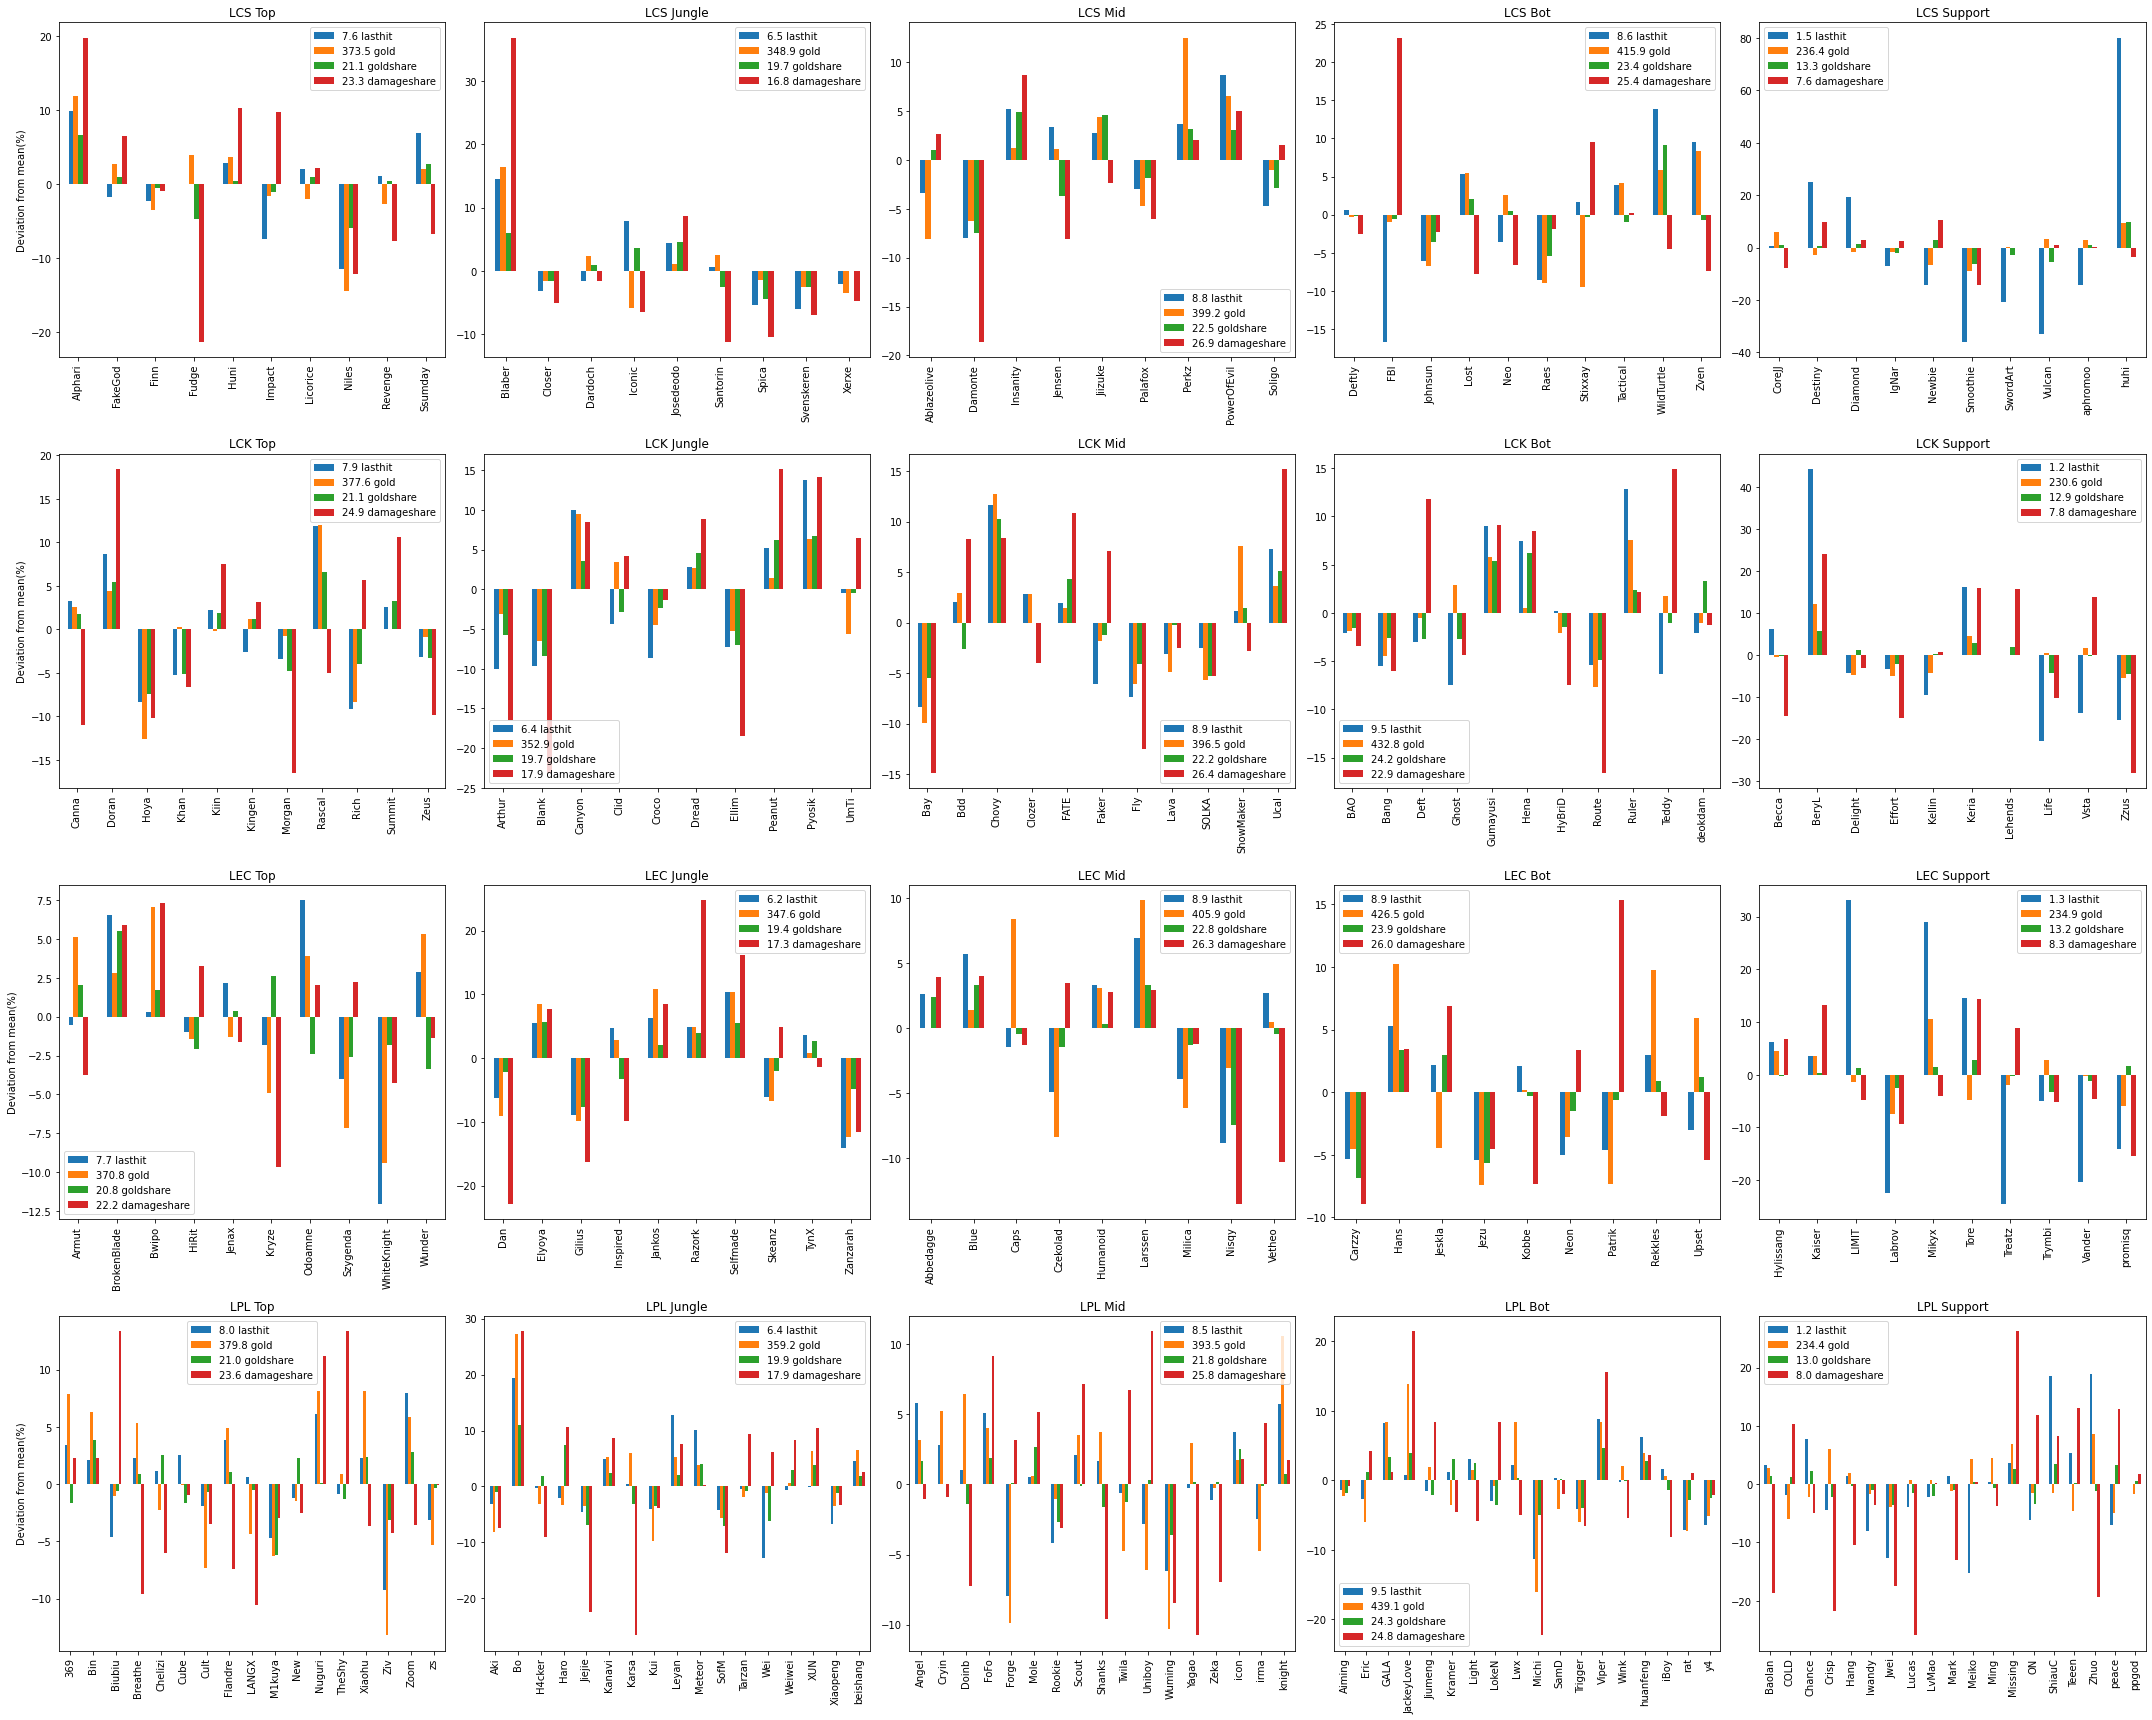

In [96]:
list_param = ["lasthit", "gold", "goldshare","damageshare"]
filter_players = df.groupby(['name',"role"]).filter(lambda x: len(x) >= 10)
role_mean = df.groupby(["League","role"]).mean()[list_param]
role_player_mean = filter_players.groupby(["League","role","name"]).mean()[list_param]
mean_desviation = 100*(role_player_mean-role_mean)/role_mean

fig, axes = plt.subplots(4, 5, figsize=(30,24))
for k, league in enumerate(df['League'].unique()):
    for i, role in enumerate(df['role'].unique()):
        ax = axes[k,i]
        mean_desviation.loc[(league, role), : ].plot(ax=ax,kind='bar',label=str(i))
        #role_player_percentage.loc[((slice(None),role ), : ].plot(ax=ax,kind='bar')
        ax.title.set_text(league+" "+role)
        axes[k,0].set_ylabel('Deviation from mean(%)')
        ax.set_xlabel('')
        for j, param in enumerate(list_param):
            legend_lab = f'{round(role_mean.loc[(league, role), : ][j],1)} {param}'
            ax.get_legend().get_texts()[j].set_text(legend_lab)

    #fig.legend(axes, labels=list_param,bbox_to_anchor=(0.78, 0.47),
    #           fancybox=True, shadow=True, prop={'size': 11})
fig.tight_layout()
fig.savefig(f"Pictures/{'Spring_Season_Players'}")

Ahora vamos a comparar estos parámetros entre las diferentes ligas para ello emplearemos el test de Student para saber si hay diferencias significativas entre las ligas.

In [97]:
def compare_2_leagues(g1,g2,alpa):
    stat, p = ttest_ind(g1,g2)
    if p > alpa:
        return False
    else:
        return True

In [98]:
param_student = ["lasthit", "gold", "goldshare","damageshare",'vision']
l0 = []
l1 = []
for i,league1 in enumerate(df['League'].unique()):
    for j,league2 in enumerate(df['League'].unique()):
        if i >= j:
            continue
        for role in df['role'].unique():
            l0 = []
            for param in param_student:
                d1 = df[(df['League']==league1) & (df['role']==role)][param]
                d2 = df[(df['League']==league2) & (df['role']==role)][param]
                h0 = compare_2_leagues(d1,d2,0.05)
                l0.append(int(h0))
            l1.append([f'{league1} {league2}',role]+l0)    

In [99]:
from scipy.stats import ttest_ind

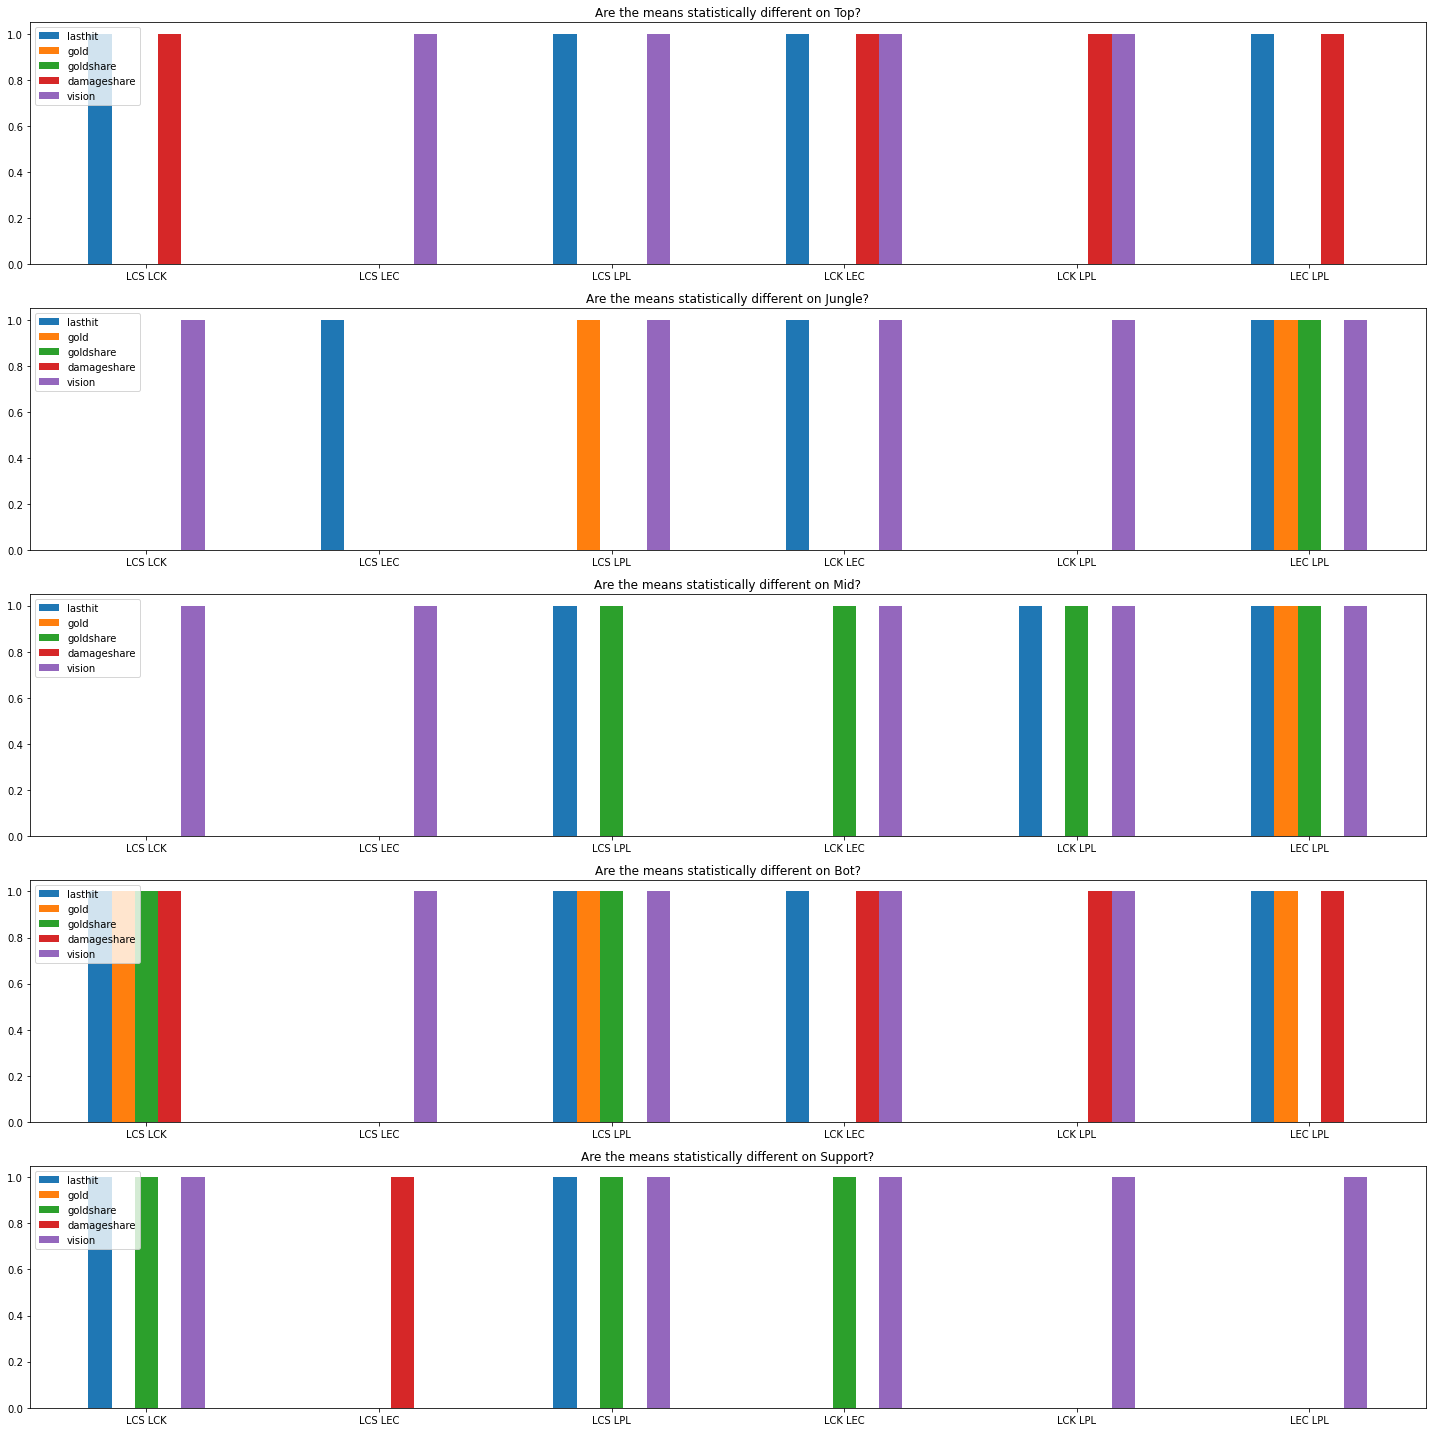

In [100]:
df2 = pd.DataFrame(l1, columns=['league','role',"lasthit", "gold", "goldshare","damageshare",'vision'])
xlabels=df2['league'].unique()
fig, axes = plt.subplots(5, 1, figsize=(20,20))
for i , rol in enumerate(df2['role'].unique()):
    df2[df2['role']==rol][param_student].plot(kind='bar',ax=axes[i])
    axes[i].title.set_text(f'Are the means statistically different on {rol}?')
    axes[i].set_xticklabels(xlabels, rotation=0)
    axes[i].legend(loc='upper left')
fig.tight_layout()
fig.savefig(f"Pictures/Mean_tstudent")

Comparando las medias de las ligas podemos ver diferencias a la hora de entender el juego como por ejemplo en la Liga coreana se juegan campeones que hacen más daño que en el resto de ligas, o que los junglas de la LEC y la LCK consiguen mas lasthits por partida que el resto de ligas

###  Modelo predictivo

A continuación vamos a estudiar las relaciones entre la victoria de un equipo y las diferentes variables. Para ello vamos estudiar las correlaciones empleando un mapa de calor.

2021-03-15 18:33:14 [matplotlib.colorbar] DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002473BABBDF0>
2021-03-15 18:33:14 [matplotlib.colorbar] DEBUG: Using auto colorbar locator on colorbar
2021-03-15 18:33:14 [matplotlib.colorbar] DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002473BABBDF0>
2021-03-15 18:33:14 [matplotlib.colorbar] DEBUG: Setting pcolormesh
2021-03-15 18:33:15 [matplotlib.colorbar] DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002473CEFA0D0>
2021-03-15 18:33:15 [matplotlib.colorbar] DEBUG: Using auto colorbar locator on colorbar
2021-03-15 18:33:15 [matplotlib.colorbar] DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002473CEFA0D0>
2021-03-15 18:33:15 [matplotlib.colorbar] DEBUG: Setting pcolormesh
2021-03-15 18:33:16 [matplotlib.colorbar] DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002473DFD26A0>
2021-03-15 18:33:16 [matplotlib.colo

2021-03-15 18:33:33 [matplotlib.colorbar] DEBUG: Setting pcolormesh


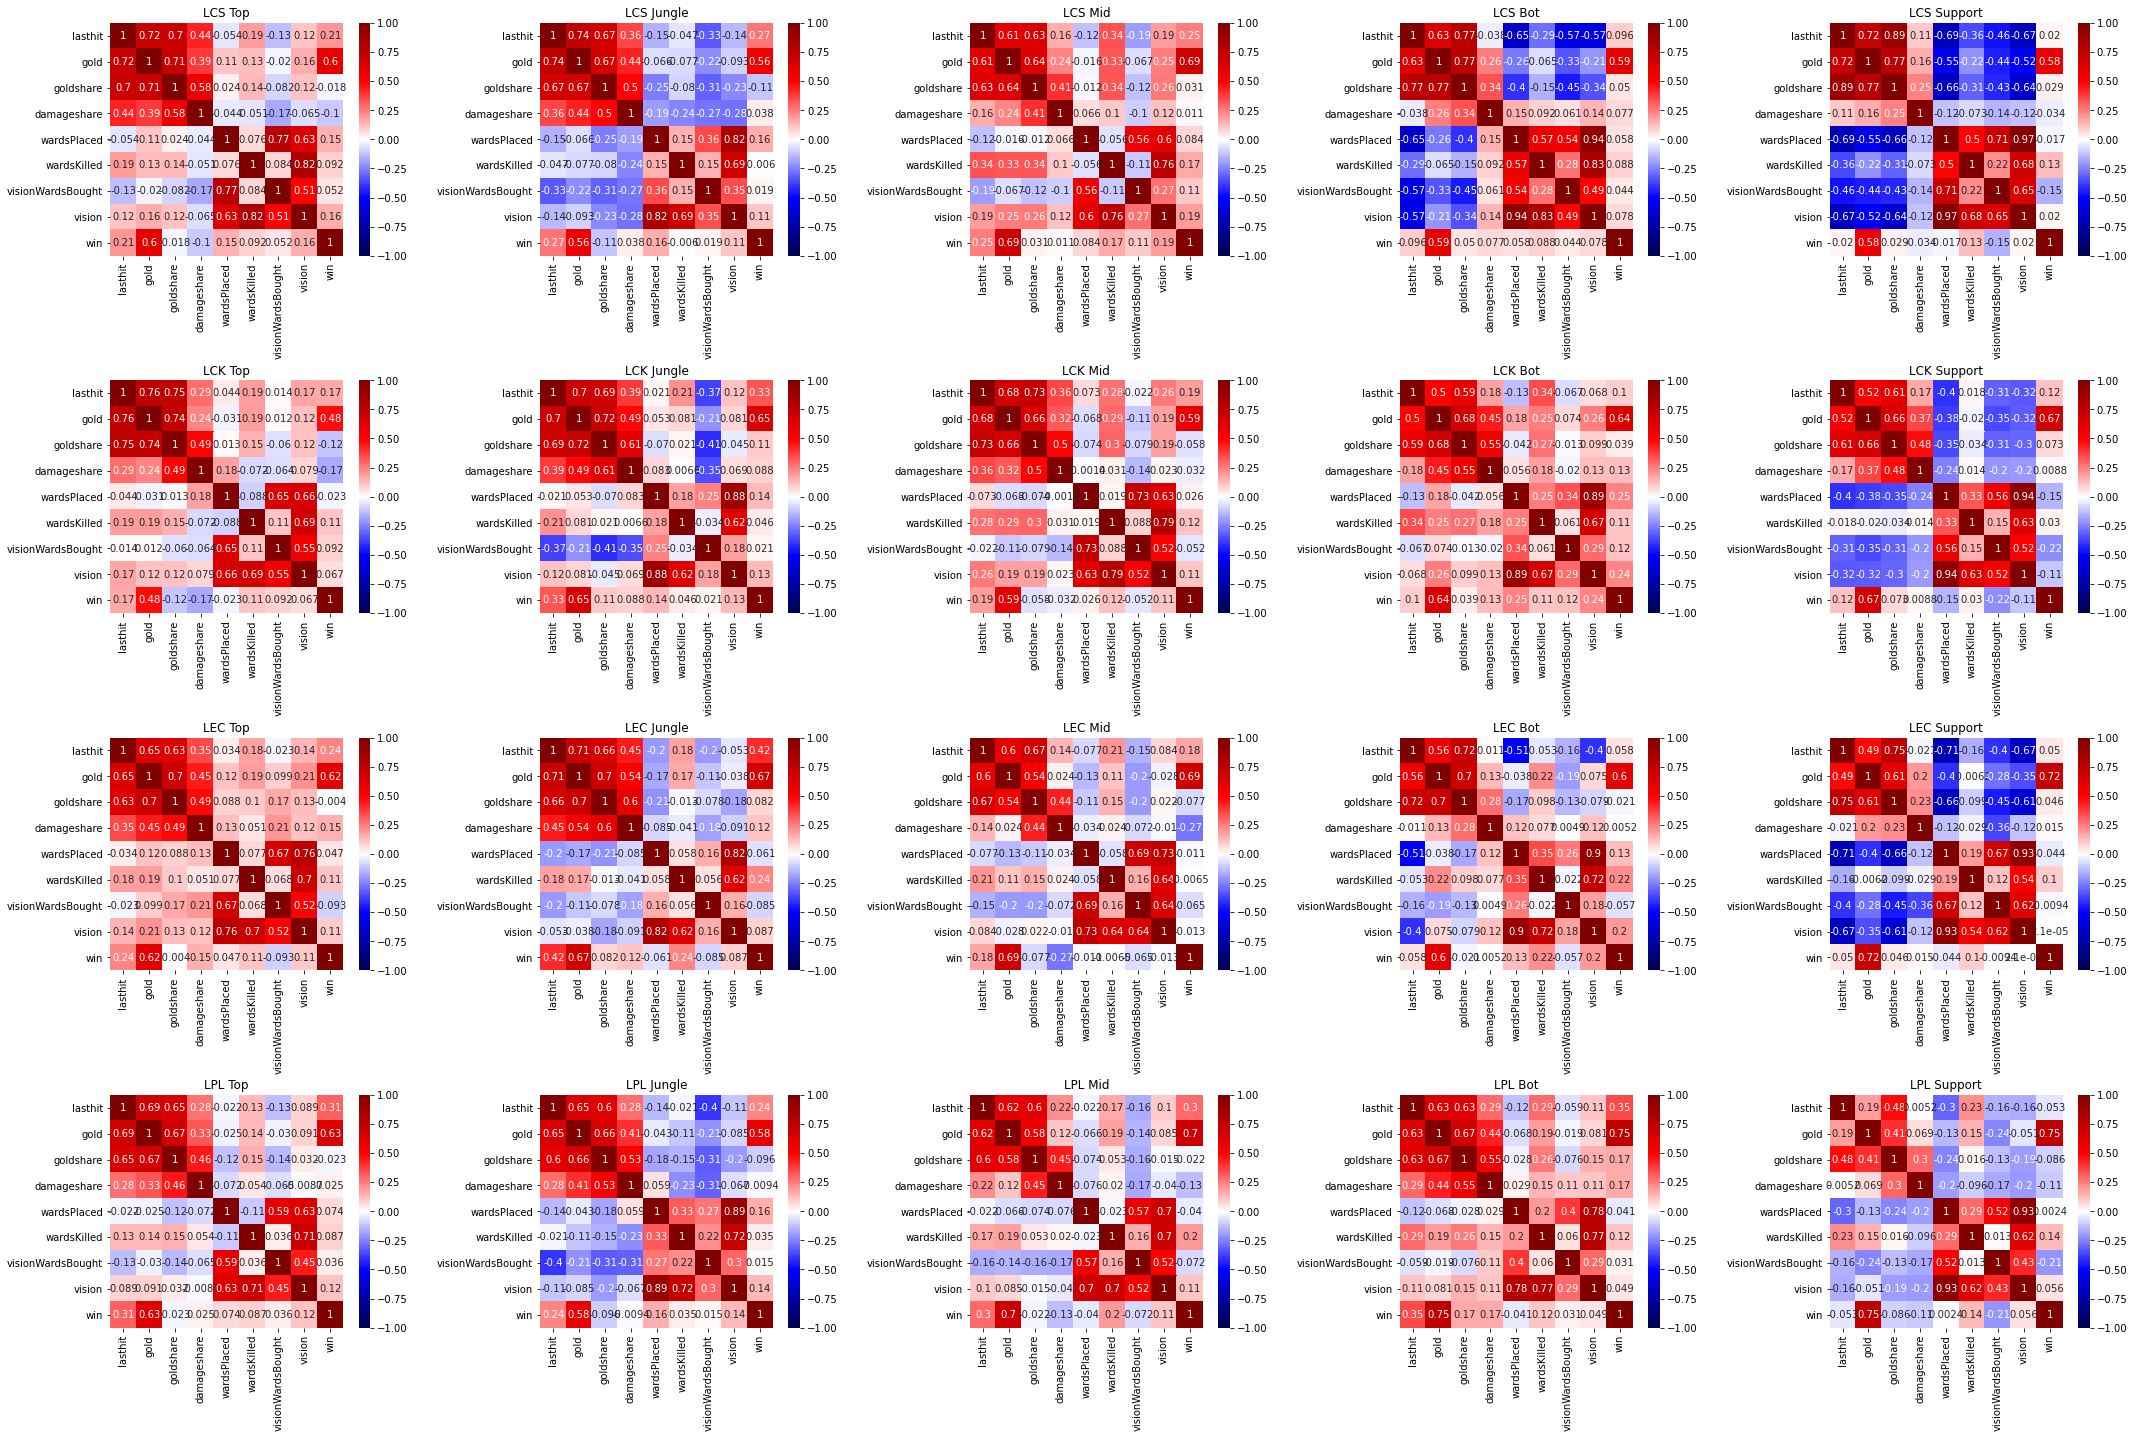

In [102]:
param_corr = ["lasthit", "gold", "goldshare","damageshare",'wardsPlaced','wardsKilled','visionWardsBought','vision','win']
fig, axes = plt.subplots(4, 5, figsize=(30,20))
for j, league in enumerate(df['League'].unique()):
    for i, role in enumerate(df['role'].unique()):
        ax = axes[j,i]
        sns.heatmap(df[(df['League']==league)&(df['role']==role)][param_corr].corr(), cmap='seismic', square=True, annot=True, vmin=-1, vmax=1, ax=ax)
        ax.title.set_text(league+" "+role)
fig.tight_layout()
fig.savefig(f"Pictures/Corr_heatmap")

Para este caso no se encuentra unas vuenas metricas que correlacionen la victoria con alguna de las variables. Aún así intentarmeos generar un modelo predictivo, empleando varios métodos

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [140]:
g = df[(df['League']=='LPL')&(df['role']=='Support')][param_corr].reset_index(drop=True)
X_n_LPL = g.drop('win', axis=1)
y_n_LPL = g['win']
X_train, X_test, y_train, y_test = train_test_split(X_n_LPL, y_n_LPL, test_size=0.33, random_state=42, stratify=y_n_LPL)

In [141]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
lr = LogisticRegression(multi_class='multinomial',
                       solver='newton-cg')

In [143]:
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [147]:
y_pred = lr.predict(X_test)

In [148]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        66
           1       0.89      1.00      0.94        66

    accuracy                           0.94       132
   macro avg       0.95      0.94      0.94       132
weighted avg       0.95      0.94      0.94       132

[[58  8]
 [ 0 66]]


In [271]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [272]:
param_grid = {'C':[1000, 10000, 100000], 'gamma':[10e-1, 10e-2, 10e-3]}
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, verbose=10, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1000, gamma=1.0 ...............................................
[CV] ................... C=1000, gamma=1.0, score=0.889, total=   0.0s
[CV] C=1000, gamma=1.0 ...............................................
[CV] ................... C=1000, gamma=1.0, score=0.870, total=   0.0s
[CV] C=1000, gamma=1.0 ...............................................
[CV] ................... C=1000, gamma=1.0, score=0.926, total=   0.0s
[CV] C=1000, gamma=1.0 ...............................................
[CV] ................... C=1000, gamma=1.0, score=0.925, total=   0.0s
[CV] C=1000, gamma=1.0 ...............................................
[CV] ................... C=1000, gamma=1.0, score=0.887, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.944, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=100000, gamma=0.1, score=0.887, total=   0.0s
[CV] C=100000, gamma=0.1 .............................................
[CV] ................. C=100000, gamma=0.1, score=0.906, total=   0.0s
[CV] C=100000, gamma=0.01 ............................................
[CV] ................ C=100000, gamma=0.01, score=0.981, total=   0.1s
[CV] C=100000, gamma=0.01 ............................................
[CV] ................ C=100000, gamma=0.01, score=0.907, total=   0.0s
[CV] C=100000, gamma=0.01 ............................................
[CV] ................ C=100000, gamma=0.01, score=0.907, total=   0.1s
[CV] C=100000, gamma=0.01 ............................................
[CV] ................ C=100000, gamma=0.01, score=0.887, total=   0.0s
[CV] C=100000, gamma=0.01 ............................................
[CV] ................ C=100000, gamma=0.01, score=0.906, total=   0.0s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1000, 10000, 100000], 'gamma': [1.0, 0.1, 0.01]},
             verbose=10)

In [239]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [240]:
y_pred = grid.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        66
           1       0.88      1.00      0.94        66

    accuracy                           0.93       132
   macro avg       0.94      0.93      0.93       132
weighted avg       0.94      0.93      0.93       132

[[57  9]
 [ 0 66]]


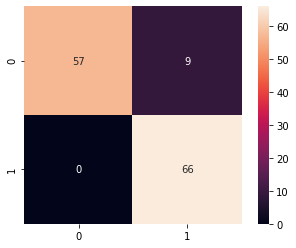

In [241]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

3044    1
3049    0
3054    0
3059    1
3064    0
3069    1
3074    0
3079    1
3084    0
3089    1
3094    1
3099    0
3104    1
3109    0
3114    0
3119    1
3124    1
3129    0
3134    1
3139    0
3144    1
3149    0
3154    1
3159    0
3164    1
3169    0
3174    1
3179    0
3184    0
3189    1
3194    1
3199    0
3204    1
3209    0
3214    0
3219    1
3224    0
3229    1
3234    0
3239    1
3244    1
3249    0
3254    1
3259    0
3264    1
3269    0
3274    0
3279    1
3284    0
3289    1
3294    1
3299    0
3304    1
3309    0
3314    1
3319    0
3324    1
3329    0
3334    1
3339    0
3344    1
3349    0
3354    1
3359    0
3364    0
3369    1
3374    1
3379    0
3384    1
3389    0
3394    0
3399    1
3404    1
3409    0
3414    0
3419    1
3424    1
3429    0
3434    1
3439    0
3444    0
3449    1
3454    0
3459    1
3464    1
3469    0
3474    1
3479    0
3484    0
3489    1
3494    1
3499    0
3504    1
3509    0
3514    1
3519    0
3524    1
3529    0
3534    0
3539    1


In [39]:
df.groupby(['League','role','win']).mean()

min          gold     lasthit  totalDamageToChamp  \
League role    win                                                            
LCK    Bot     0    33.253040  13280.754717  311.459119        12465.522013   
               1    33.253040  15626.012579  319.308176        16366.182390   
       Jungle  0    33.253040  10663.522013  203.754717         9857.132075   
               1    33.253040  12735.188679  223.748428        12641.496855   
       Mid     0    33.253040  12185.402516  288.106918        14724.993711   
               1    33.253040  14172.251572  302.459119        18005.295597   
       Support 0    33.253040   6983.201258   36.836478         4316.220126   
               1    33.253040   8313.685535   41.911950         5449.823899   
       Top     0    33.253040  11767.987421  257.641509        14485.452830   
               1    33.253040  13387.559748  269.025157        15814.433962   
LCS    Bot     0    33.661667  12839.542857  282.457143        14070.314286   
               1    33.661667  15255.885714  297.471429        17692.842857   
       Jungle  0    33.661667  10832.485714  207.771429         9418.071429   
               1    33.661667  12521.742857  223.000000        11308.785714   
       Mid     0    33.661667  12312.785714  287.357143        15148.357143   
               1    33.661667  14594.314286  304.028571        18243.257143   
       Support 0    33.661667   7228.242857   49.857143         4196.985714   
               1    33.661667   8614.214286   50.771429         4949.414286   
       Top     0    33.661667  11538.285714  247.814286        13258.285714   
               1    33.661667  13596.957143  262.671429        14773.814286   
LEC    Bot     0    33.168667  12992.853333  292.346667        14669.826667   
               1    33.168667  15359.026667  297.720000        18149.546667   
       Jungle  0    33.168667  10404.600000  192.360000         9573.293333   
               1    33.168667  12562.666667  216.293333        12355.586667   
       Mid     0    33.168667  12395.426667  289.666667        15717.120000   
               1    33.168667  14560.600000  301.560000        16875.760000   
       Support 0    33.168667   7046.706667   41.066667         4538.066667   
               1    33.168667   8488.533333   44.960000         5655.973333   
       Top     0    33.168667  11216.386667  245.600000        12061.386667   
               1    33.168667  13364.373333  262.266667        15479.853333   
LPL    Bot     0    31.060500  12271.705000  286.455000        12889.645000   
               1    31.060500  15098.890000  309.015000        17568.145000   
       Jungle  0    31.060500  10194.805000  190.750000         9493.355000   
               1    31.060500  12023.585000  203.410000        12070.010000   
       Mid     0    31.060500  11114.610000  256.020000        13944.225000   
               1    31.060500  13310.875000  273.480000        16959.255000   
       Support 0    31.060500   6613.000000   36.750000         4255.755000   
               1    31.060500   7884.095000   35.690000         5106.835000   
       Top     0    31.060500  10708.235000  237.120000        12211.980000   
               1    31.060500  12857.570000  257.145000        16007.570000   

                      gold/min  lasthit/min  goldshare  damageshare  
League role    win                                                   
LCK    Bot     0    395.426870     9.308187  24.091177    22.036284  
               1    470.190889     9.594786  24.268190    23.739260  
       Jungle  0    319.463777     6.115115  19.491204    17.376146  
               1    386.295478     6.770331  19.906159    18.512557  
       Mid     0    365.234590     8.686139  22.266829    26.639014  
               1    427.837222     9.105675  22.035265    26.195016  
       Support 0    209.600756     1.115178  12.799245     7.814897  
               1    251.658589     1.268133  12.967084     7.876272  
       